<h1><center>Big Mobility Data Analytics for Public Health Interview Task</center></h1>

## Name: Tanmay Jain

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from keplergl import KeplerGl
import json

## Importing the Taxi Dataset

In [2]:
# Importing the datasets

taxi_df = pd.read_csv('data.txt', parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
taxi_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2,2015-01-15 19:05:39+00:00,2015-01-15 19:23:42+00:00,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,3.25,17.05
1,2,2015-01-15 19:05:39+00:00,2015-01-15 19:32:00+00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68
2,2,2015-01-15 19:05:40+00:00,2015-01-15 19:21:00+00:00,5,2.83,-73.968704,40.754246,-73.955124,40.786858,12.5,0.00,14.30
3,2,2015-01-15 19:05:40+00:00,2015-01-15 19:28:18+00:00,5,8.33,-73.863060,40.769581,-73.952713,40.785782,26.0,8.08,41.21
4,2,2015-01-15 19:05:41+00:00,2015-01-15 19:20:36+00:00,1,2.37,-73.945541,40.779423,-73.980850,40.786083,11.5,0.00,13.30


### Only keeping rows in which the dropoff time was between 11:30 am to 2:00 pm or 5 pm to 9 pm. These rides can be assumed to be done to restaurants for meals.

In [3]:
mask1 = (taxi_df["tpep_dropoff_datetime"].dt.time >= pd.to_datetime("11:30:00").time()) & \
        (taxi_df["tpep_dropoff_datetime"].dt.time <= pd.to_datetime("14:00:00").time())

mask2 = (taxi_df["tpep_dropoff_datetime"].dt.time >= pd.to_datetime("17:00:00").time()) & \
        (taxi_df["tpep_dropoff_datetime"].dt.time <= pd.to_datetime("21:00:00").time())

# apply both masks and keep only the rows that satisfy either of them
taxi_df = taxi_df.loc[mask1 | mask2]
taxi_df = taxi_df.reset_index(drop = True)
taxi_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2,2015-01-15 19:05:39+00:00,2015-01-15 19:23:42+00:00,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,3.25,17.05
1,2,2015-01-15 19:05:39+00:00,2015-01-15 19:32:00+00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68
2,2,2015-01-15 19:05:40+00:00,2015-01-15 19:21:00+00:00,5,2.83,-73.968704,40.754246,-73.955124,40.786858,12.5,0.00,14.30
3,2,2015-01-15 19:05:40+00:00,2015-01-15 19:28:18+00:00,5,8.33,-73.863060,40.769581,-73.952713,40.785782,26.0,8.08,41.21
4,2,2015-01-15 19:05:41+00:00,2015-01-15 19:20:36+00:00,1,2.37,-73.945541,40.779423,-73.980850,40.786083,11.5,0.00,13.30
5,2,2015-01-15 19:05:41+00:00,2015-01-15 19:20:22+00:00,2,7.13,-73.874458,40.774010,-73.952377,40.718590,21.5,4.50,27.80
6,2,2015-01-15 19:05:41+00:00,2015-01-15 19:31:00+00:00,1,3.60,-73.976601,40.751896,-73.998924,40.714596,17.5,0.00,19.30
7,2,2015-01-15 19:05:41+00:00,2015-01-15 19:10:22+00:00,1,0.89,-73.994957,40.745079,-73.999939,40.734650,5.5,1.62,8.92
8,2,2015-01-15 19:05:41+00:00,2015-01-15 19:10:55+00:00,1,0.96,-74.000938,40.747063,-74.003563,40.735512,5.5,1.30,8.60
9,2,2015-01-15 19:05:41+00:00,2015-01-15 19:12:36+00:00,2,1.25,-74.002777,40.717892,-74.007919,40.704220,6.5,1.50,9.80


## Importing the Restaurant Dataset

In [4]:
# Reading the Restaurant Dataset
restaurant_df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
restaurant_df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection
399915,50051468,Yong Kong Street,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
399916,41555297,RUBY FALLS NIGHTLIFE CAFE,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection


### Only keeping the relevant columns and removing any duplicate rows comprising information about the same restaurant multiple times

In [5]:
# Only keeping the relevant columns and removing any duplicate rows comprising information of the same restaurant
restaurant_df = restaurant_df[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION']]
restaurant_df = restaurant_df.drop_duplicates(keep= 'first')
restaurant_df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,Italian
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,Italian
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,Chinese
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,American
5,50015855,KABAB HOUSE NYC,QUEENS,4339,MAIN ST,11355.0,Pakistani
...,...,...,...,...,...,...,...
399028,50064356,ROAST KITCHEN,MANHATTAN,209,W 57TH ST,10019.0,Other
399279,50068112,CHILES GRILL,MANHATTAN,2131,3RD AVE,10035.0,Other
399280,50069080,NaN,MANHATTAN,329,W 51ST ST,10019.0,Other
399539,50060461,JIA XIANG KITCHEN INC,BROOKLYN,802,56TH ST,11220.0,Other


### Checking and dropping any null values, processing the zipcode field and joining the address columns together for easier geocoding

In [6]:

# Checking if there are any null values in the dataset
print(restaurant_df.isnull().sum())

# Dropping any rows with no address information as we cannot geocode them 
restaurant_df = restaurant_df.dropna(subset = ['ZIPCODE', 'BUILDING']).reset_index(drop = True)

# Converting Zipcode to string data type from float (converting it to integer first to remove the decimal)
restaurant_df['ZIPCODE'] = restaurant_df['ZIPCODE'].astype('object').astype(int).astype(str)

# Making a new column named full_address to store all address information in one column. Should make geocoding easier
restaurant_df['full_address'] = restaurant_df.apply(lambda x: ', '.join([x['BUILDING'], x['STREET'], str(int(x['ZIPCODE']))]), axis=1)

restaurant_df

CAMIS                    0
DBA                    359
BORO                     0
BUILDING                20
STREET                   9
ZIPCODE                  9
CUISINE DESCRIPTION      0
dtype: int64


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,full_address
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016,Italian,"635, SECOND AVENUE, 10016"
1,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106,Italian,"2507, BROADWAY, 11106"
2,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314,Chinese,"11C, HOLDEN BLVD, 10314"
3,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209,American,"8015, 5 AVENUE, 11209"
4,50015855,KABAB HOUSE NYC,QUEENS,4339,MAIN ST,11355,Pakistani,"4339, MAIN ST, 11355"
...,...,...,...,...,...,...,...,...
26480,50064356,ROAST KITCHEN,MANHATTAN,209,W 57TH ST,10019,Other,"209, W 57TH ST, 10019"
26481,50068112,CHILES GRILL,MANHATTAN,2131,3RD AVE,10035,Other,"2131, 3RD AVE, 10035"
26482,50069080,NaN,MANHATTAN,329,W 51ST ST,10019,Other,"329, W 51ST ST, 10019"
26483,50060461,JIA XIANG KITCHEN INC,BROOKLYN,802,56TH ST,11220,Other,"802, 56TH ST, 11220"


# Geocoding to get the coordinates of restaurants based on their building, street address and zipcode

### Using GoogleMaps Geocoding API to perform geocoding:

In [170]:
import googlemaps
# Setting Google MAPS API_Key
g_API = "API-KEY-REMOVED-FOR-PRIVACY"
gmaps_key = googlemaps.Client(key=g_API)

In [171]:
# Testing if our API Key Works
geocode_obj = gmaps_key.geocode(restaurant_df.loc[2, "full_address"])
lat = geocode_obj[0]['geometry']['location']['lat']
lon = geocode_obj[0]['geometry']['location']['lng']

print(lat, lon)

40.7595044 -73.9271644


### Making new latitude and longitude columns in the restaurant_df and setting them as none

In [184]:
restaurant_df["longitude"] = None
restaurant_df["latitude"] = None

### Geocoding:

In [186]:
for i in restaurant_df.index:
    geocode_obj = gmaps_key.geocode(restaurant_df.loc[i, "full_address"])
    if i%100 == 0:
        print("Number of Addresses Geocoded till now: ", i)
    try:
        lat = geocode_obj[0]['geometry']['location']['lat']
        lon = geocode_obj[0]['geometry']['location']['lng']
        restaurant_df.loc[i,'latitude'] = lat
        restaurant_df.loc[i,'longitude'] = lon
    except:
        lat = None
        lon = None

Number of Addresses Geocoded till now:  0
Number of Addresses Geocoded till now:  100
Number of Addresses Geocoded till now:  200
Number of Addresses Geocoded till now:  300
Number of Addresses Geocoded till now:  400
Number of Addresses Geocoded till now:  500
Number of Addresses Geocoded till now:  600
Number of Addresses Geocoded till now:  700
Number of Addresses Geocoded till now:  800
Number of Addresses Geocoded till now:  900
Number of Addresses Geocoded till now:  1000
Number of Addresses Geocoded till now:  1100
Number of Addresses Geocoded till now:  1200
Number of Addresses Geocoded till now:  1300
Number of Addresses Geocoded till now:  1400
Number of Addresses Geocoded till now:  1500
Number of Addresses Geocoded till now:  1600
Number of Addresses Geocoded till now:  1700
Number of Addresses Geocoded till now:  1800
Number of Addresses Geocoded till now:  1900
Number of Addresses Geocoded till now:  2000
Number of Addresses Geocoded till now:  2100
Number of Addresses Ge

Number of Addresses Geocoded till now:  18100
Number of Addresses Geocoded till now:  18200
Number of Addresses Geocoded till now:  18300
Number of Addresses Geocoded till now:  18400
Number of Addresses Geocoded till now:  18500
Number of Addresses Geocoded till now:  18600
Number of Addresses Geocoded till now:  18700
Number of Addresses Geocoded till now:  18800
Number of Addresses Geocoded till now:  18900
Number of Addresses Geocoded till now:  19000
Number of Addresses Geocoded till now:  19100
Number of Addresses Geocoded till now:  19200
Number of Addresses Geocoded till now:  19300
Number of Addresses Geocoded till now:  19400
Number of Addresses Geocoded till now:  19500
Number of Addresses Geocoded till now:  19600
Number of Addresses Geocoded till now:  19700
Number of Addresses Geocoded till now:  19800
Number of Addresses Geocoded till now:  19900
Number of Addresses Geocoded till now:  20000
Number of Addresses Geocoded till now:  20100
Number of Addresses Geocoded till 

### Processing the Geocodes and saving the dataset so we don't have to geocode again.

In [193]:
# Checking how many geocodes could not be found
print(restaurant_df.isnull().sum())

# Removing the geocodes that could not be found
restaurant_df_cleaned = restaurant_df.dropna(subset = ['longitude', 'latitude']).reset_index(drop = True)

# Saving this dataset as a csv so we don't have to perform geocoding again
restaurant_df_cleaned.to_csv("restaurant_data_geocoded.csv")
restaurant_df_cleaned

CAMIS                    0
DBA                    356
BORO                     0
BUILDING                 0
STREET                   0
ZIPCODE                  0
CUISINE DESCRIPTION      0
full_address             0
longitude               34
latitude                34
dtype: int64


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,full_address,longitude,latitude
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016,Italian,"635, SECOND AVENUE, 10016",-73.975777,40.745295
1,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106,Italian,"2507, BROADWAY, 11106",-73.927164,40.759504
2,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314,Chinese,"11C, HOLDEN BLVD, 10314",-74.121197,40.604667
3,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209,American,"8015, 5 AVENUE, 11209",-74.03295,40.621212
4,50015855,KABAB HOUSE NYC,QUEENS,4339,MAIN ST,11355,Pakistani,"4339, MAIN ST, 11355",-73.825819,40.75163
...,...,...,...,...,...,...,...,...,...,...
26446,50064356,ROAST KITCHEN,MANHATTAN,209,W 57TH ST,10019,Other,"209, W 57TH ST, 10019",-73.980454,40.765939
26447,50068112,CHILES GRILL,MANHATTAN,2131,3RD AVE,10035,Other,"2131, 3RD AVE, 10035",-73.927164,40.794065
26448,50069080,NaN,MANHATTAN,329,W 51ST ST,10019,Other,"329, W 51ST ST, 10019",-73.986815,40.763601
26449,50060461,JIA XIANG KITCHEN INC,BROOKLYN,802,56TH ST,11220,Other,"802, 56TH ST, 11220",-74.007247,40.637608


In [7]:
restaurant_df_cleaned = pd.read_csv('restaurant_data_geocoded.csv')

### Making a new column named closest_restaurant in taxi_df. 

### This column will store the 'CAMIS' or unique id of the restaurant closes to the drop location of the trip.

### This column will also act as the foreign key to link the two datasets together

In [8]:
taxi_df['closest_restaurant'] = None

In [9]:
# Converting latitude and longitude values to float from object
restaurant_df_cleaned['latitude'] = restaurant_df_cleaned['latitude'].astype('float64')
restaurant_df_cleaned['longitude'] = restaurant_df_cleaned['longitude'].astype('float64')
restaurant_df_cleaned

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,full_address,longitude,latitude
0,0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016,Italian,"635, SECOND AVENUE, 10016",-73.975777,40.745295
1,1,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106,Italian,"2507, BROADWAY, 11106",-73.927164,40.759504
2,2,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314,Chinese,"11C, HOLDEN BLVD, 10314",-74.121197,40.604667
3,3,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209,American,"8015, 5 AVENUE, 11209",-74.032950,40.621212
4,4,50015855,KABAB HOUSE NYC,QUEENS,4339,MAIN ST,11355,Pakistani,"4339, MAIN ST, 11355",-73.825819,40.751630
...,...,...,...,...,...,...,...,...,...,...,...
26446,26446,50064356,ROAST KITCHEN,MANHATTAN,209,W 57TH ST,10019,Other,"209, W 57TH ST, 10019",-73.980454,40.765939
26447,26447,50068112,CHILES GRILL,MANHATTAN,2131,3RD AVE,10035,Other,"2131, 3RD AVE, 10035",-73.927164,40.794065
26448,26448,50069080,NaN,MANHATTAN,329,W 51ST ST,10019,Other,"329, W 51ST ST, 10019",-73.986815,40.763601
26449,26449,50060461,JIA XIANG KITCHEN INC,BROOKLYN,802,56TH ST,11220,Other,"802, 56TH ST, 11220",-74.007247,40.637608


# Linking the two datasets:

## Vectorized Haversine function to compute haversine distance between coordinates stored in numpy vectors:

In [10]:
def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    metre_dist = 6367000 * c 
    return metre_dist

## 1. We iterate through the taxi_df dataframe. 
## 2. For each taxi ride we compute the haversine distance from the drop location of the ride to the coordinates of each restaurant. This is done using the haversine_np function which outputs distance of the drop off location from every restaurant in a vector. 
## 3. We consider the element in the vector having the least value and check if the distance is less than 50m. If it is, we set it as the taxi ride's closest restaurant

In [11]:
for taxi_idx, taxi_ride in taxi_df.iterrows():
    if taxi_idx%10000 == 0:
        print("Indexes completed: ", taxi_idx)
    dropoff_lat = np.array(taxi_ride['dropoff_latitude'])
    dropoff_long = np.array(taxi_ride['dropoff_longitude'])
    restaurant_lats = np.array(restaurant_df_cleaned['latitude'])
    restaurant_longs = np.array(restaurant_df_cleaned['longitude'])
#     print(dropoff_lat.dtype, dropoff_long.dtype, restaurant_lats.dtype, restaurant_longs.dtype)
    distances = haversine_np(dropoff_long, dropoff_lat, restaurant_longs, restaurant_lats)
    closest_idx = np.argmin(distances) 
    if distances[closest_idx] < 50 and distances.size != 0:
        taxi_df.loc[taxi_idx, 'closest_restaurant'] = restaurant_df_cleaned.loc[closest_idx, 'CAMIS']



Indexes completed:  0
Indexes completed:  10000
Indexes completed:  20000
Indexes completed:  30000


### 4. Checking to see which taxi rides did not have any restaurants within 50m of their drop off location. These rides were dropped from our dataframe.

In [12]:
print(taxi_df.isnull().sum())

# Dropping all the cab ride rows with no restuarants in their vicinity 

taxi_df_linked = taxi_df.dropna(subset ='closest_restaurant').reset_index(drop = True)
taxi_df_linked

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            0
dropoff_latitude             0
fare_amount                  0
tip_amount                   0
total_amount                 0
closest_restaurant       10081
dtype: int64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,closest_restaurant
0,2,2015-01-15 19:05:39+00:00,2015-01-15 19:32:00+00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68,41596546
1,2,2015-01-15 19:05:41+00:00,2015-01-15 19:20:22+00:00,2,7.13,-73.874458,40.774010,-73.952377,40.718590,21.5,4.50,27.80,41635871
2,2,2015-01-15 19:05:41+00:00,2015-01-15 19:31:00+00:00,1,3.60,-73.976601,40.751896,-73.998924,40.714596,17.5,0.00,19.30,41477468
3,2,2015-01-15 19:05:41+00:00,2015-01-15 19:10:22+00:00,1,0.89,-73.994957,40.745079,-73.999939,40.734650,5.5,1.62,8.92,50043664
4,2,2015-01-15 19:05:41+00:00,2015-01-15 19:10:55+00:00,1,0.96,-74.000938,40.747063,-74.003563,40.735512,5.5,1.30,8.60,40993101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23393,2,2015-01-15 12:00:59+00:00,2015-01-15 12:06:33+00:00,1,0.70,-74.001877,40.740543,-73.993164,40.742947,5.5,1.00,7.30,41619911
23394,2,2015-01-15 12:01:00+00:00,2015-01-15 12:12:32+00:00,5,1.33,-73.968979,40.751869,-73.977196,40.764767,9.0,1.80,11.60,41366519
23395,2,2015-01-15 12:01:01+00:00,2015-01-15 12:16:39+00:00,1,2.14,-73.947327,40.775948,-73.973137,40.764462,11.5,0.00,12.30,50005694
23396,2,2015-01-15 12:01:02+00:00,2015-01-15 12:16:15+00:00,1,2.21,-74.005058,40.726089,-74.012962,40.712978,10.5,0.00,11.30,50033802


### Merging the two datasets using the restaurant ID column 'CAMIS'


In [13]:
# Merging the two datasets using the restaurant ID column 'CAMIS'
cab_rides_with_restaurants = pd.merge(taxi_df_linked, restaurant_df_cleaned, 
                                      how='left', left_on='closest_restaurant', right_on='CAMIS')
cab_rides_with_restaurants

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,full_address,longitude,latitude
0,2,2015-01-15 19:05:39+00:00,2015-01-15 19:32:00+00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,...,41596546,MARGON RESTAURANT,MANHATTAN,136,WEST 46 STREET,10036,"Latin (Cuban, Dominican, Puerto Rican, South &...","136, WEST 46 STREET, 10036",-73.984000,40.757872
1,2,2015-01-15 19:05:41+00:00,2015-01-15 19:20:22+00:00,2,7.13,-73.874458,40.774010,-73.952377,40.718590,21.5,...,41635871,OVER THE EIGHT,BROOKLYN,594,UNION AVENUE,11211,American,"594, UNION AVENUE, 11211",-73.952069,40.718238
2,2,2015-01-15 19:05:41+00:00,2015-01-15 19:31:00+00:00,1,3.60,-73.976601,40.751896,-73.998924,40.714596,17.5,...,41477468,SHANGHAI ASIAN MANOR,MANHATTAN,21,MOTT STREET,10013,Chinese,"21, MOTT STREET, 10013",-73.999033,40.714407
3,2,2015-01-15 19:05:41+00:00,2015-01-15 19:10:22+00:00,1,0.89,-73.994957,40.745079,-73.999939,40.734650,5.5,...,50043664,QUALITY EATS,MANHATTAN,19,GREENWICH AVE,10014,American,"19, GREENWICH AVE, 10014",-74.000055,40.734502
4,2,2015-01-15 19:05:41+00:00,2015-01-15 19:10:55+00:00,1,0.96,-74.000938,40.747063,-74.003563,40.735512,5.5,...,40993101,SANT AMBROEUS,MANHATTAN,259,WEST 4 STREET,10014,Italian,"259, WEST 4 STREET, 10014",-74.003141,40.735426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23393,2,2015-01-15 12:00:59+00:00,2015-01-15 12:06:33+00:00,1,0.70,-74.001877,40.740543,-73.993164,40.742947,5.5,...,41619911,FLAVORS,MANHATTAN,100,WEST 23 STREET,10011,American,"100, WEST 23 STREET, 10011",-73.993172,40.742858
23394,2,2015-01-15 12:01:00+00:00,2015-01-15 12:12:32+00:00,5,1.33,-73.968979,40.751869,-73.977196,40.764767,9.0,...,41366519,STARBUCKS,MANHATTAN,1411,6 AVENUE,10019,CafÃ©/Coffee/Tea,"1411, 6 AVENUE, 10019",-73.977134,40.764851
23395,2,2015-01-15 12:01:01+00:00,2015-01-15 12:16:39+00:00,1,2.14,-73.947327,40.775948,-73.973137,40.764462,11.5,...,50005694,VIVE LA CREPE,MANHATTAN,1W,59TH ST,10019,French,"1W, 59TH ST, 10019",-73.972955,40.764272
23396,2,2015-01-15 12:01:02+00:00,2015-01-15 12:16:15+00:00,1,2.21,-74.005058,40.726089,-74.012962,40.712978,10.5,...,50033802,ONE WORLD OBSERVATORY,MANHATTAN,1,WORLD TRADE CTR,10007,American,"1, WORLD TRADE CTR, 10007",-74.013359,40.712766


#### Dropping the rows which don't have the resutaurant's name (DBA)

In [14]:
cab_rides_with_restaurants = cab_rides_with_restaurants.dropna(subset = 'DBA').reset_index(drop = True)

# Exploratory Map

The following is an exploratory map implemented using kepler.gl
There are two layers in the map (two different visualizations)

Layer 1: Boro-Amount:
This is a grid plot where the height of the grid block is represented by the average total amount of fare (including the tip) in the grid block area. 
The color of the grid block represent the BORO. The mapping of each color shade to its respective BORO tag can be accessed using the legend.

Layer 2: Cuisine-Distance
This is a grid plot where the height of the grid block is represented by the average trip distance taken by passengers to get to the grid block area. The color of each grid block represents the Cuisine. 

#### Please Note: If the exploratory map is not embedded below due to any issues, please access the map using the html version exported locally. The HTML file is saved as "exploratory_map.html" in the repository. You can turn the two layers on and off by opening up the side panel using the arrow button on the top left. 

<a href="./exploratory_map.html">Link to Exploratory Map HTML</a>

In [15]:
df_for_analysis = cab_rides_with_restaurants.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime"], axis=1)

In [20]:
map_1 = KeplerGl(height = 700)
map_1.add_data(df_for_analysis, name = 'vis')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'vis': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,…

In [21]:
map_1.save_to_html(file_name='exploratory_map.html')

Map saved to exploratory_map.html!


## 4. (a) How far do people travel based on different types of cuisine (“CUISINE DESCRIPTION”)?

### Note: I only considered the top 20 most common restaurant cuisines in the dataset as there are too many different cuisines in the dataset. 

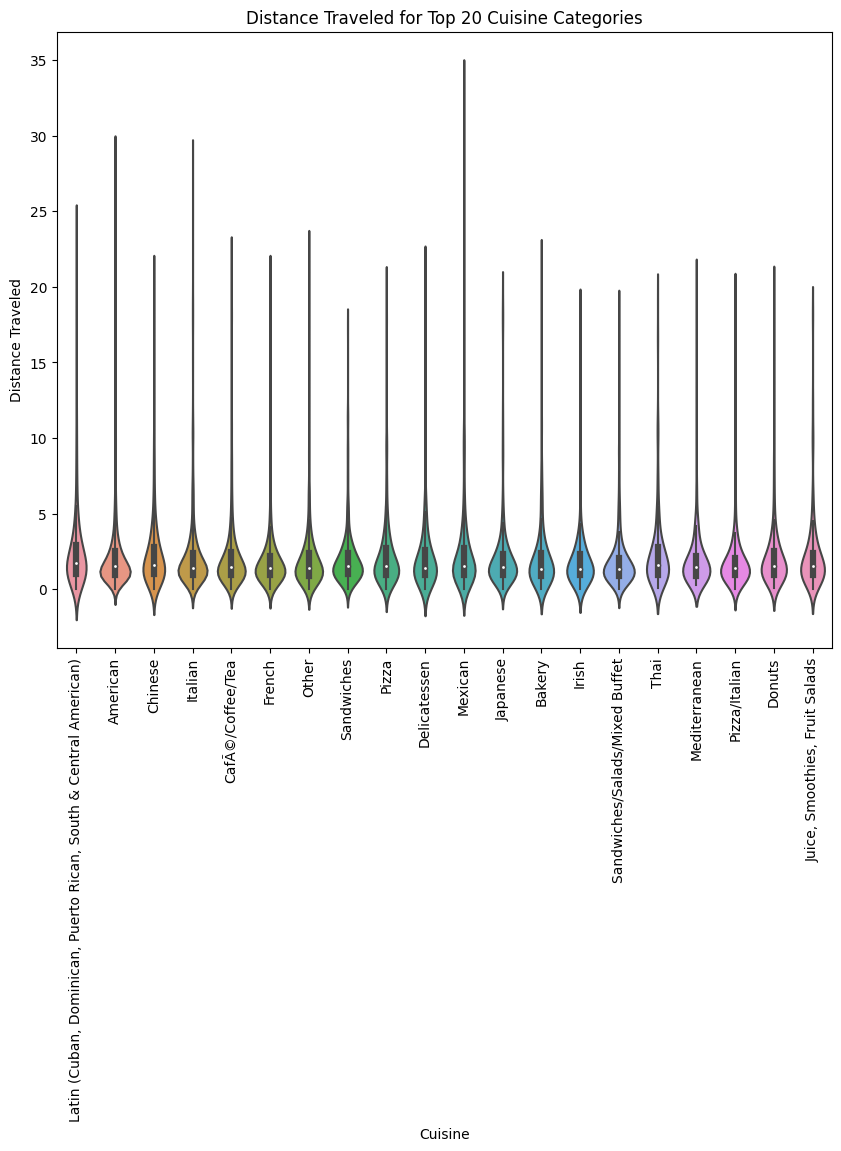

In [42]:
top_cuisines = cab_rides_with_restaurants['CUISINE DESCRIPTION'].value_counts().nlargest(20).index.tolist()

# filter the dataset to only include the top 20 cuisines
data = cab_rides_with_restaurants[cab_rides_with_restaurants['CUISINE DESCRIPTION'].isin(top_cuisines)]
plt.figure(figsize=(10, 8))
sns.violinplot(x='CUISINE DESCRIPTION', y='trip_distance', data=data)
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Distance Traveled')
plt.title('Distance Traveled for Top 20 Cuisine Categories')
plt.show()

## 4. (a) How does the distance traveled differ by BORO

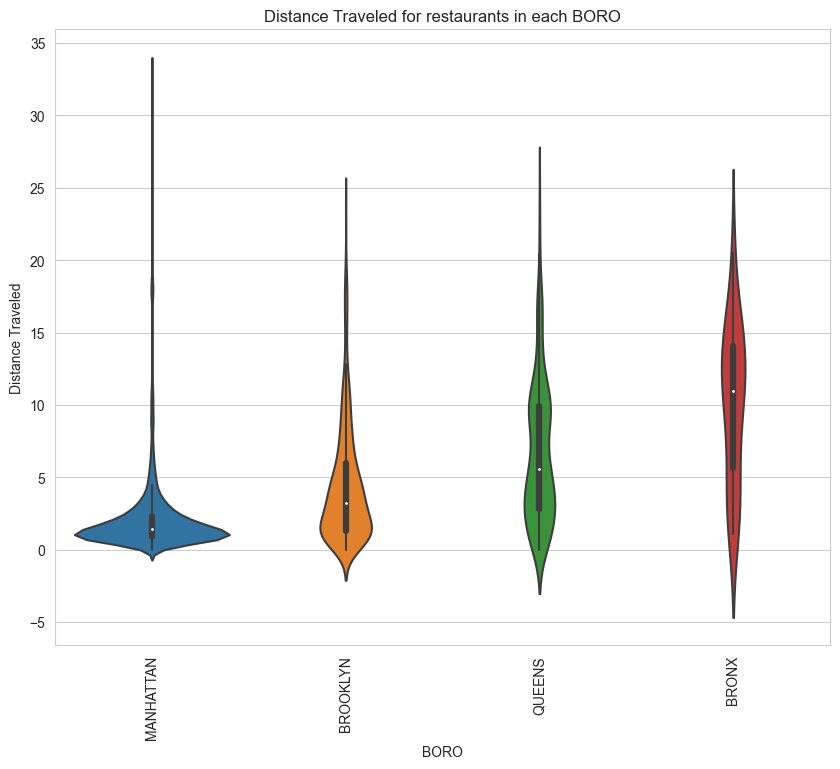

In [72]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='BORO', y='trip_distance', data=cab_rides_with_restaurants)
plt.xticks(rotation=90)
plt.xlabel('BORO')
plt.ylabel('Distance Traveled')
plt.title('Distance Traveled for restaurants in each BORO')
plt.show()

## 4. (a) How does the distance traveled differ by Time of Meal?

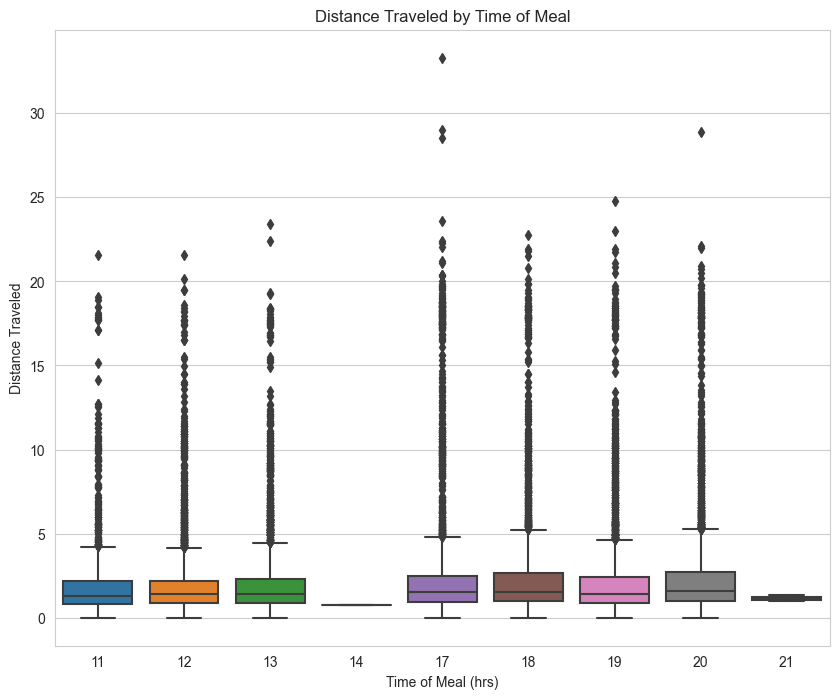

In [73]:
cab_rides_with_restaurants['time_hour'] = cab_rides_with_restaurants['tpep_dropoff_datetime'].apply(lambda x: x.hour)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.boxplot(x='time_hour', y='trip_distance', data=cab_rides_with_restaurants)
plt.xlabel('Time of Meal (hrs)')
plt.ylabel('Distance Traveled')
plt.title('Distance Traveled by Time of Meal')
plt.show()

## 4. (b) Average Tipping amount by Cuisine
### Note: I only considered the top 20 most common restaurant cuisines in the dataset as there are too many different cuisines in the dataset. 

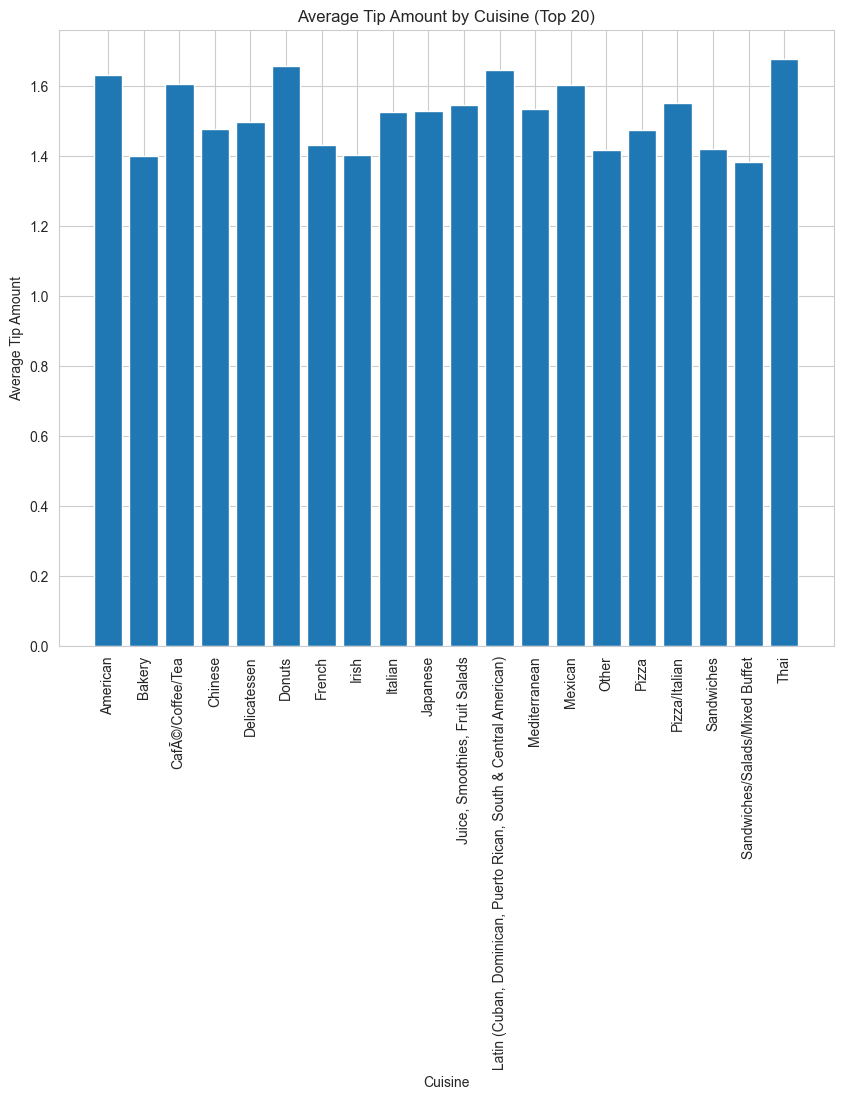

In [62]:
top_cuisines = cab_rides_with_restaurants['CUISINE DESCRIPTION'].value_counts().head(20).index.tolist()

# create a bar chart of average tip amount by cuisine for the top 20 cuisines
avg_tip_by_cuisine = cab_rides_with_restaurants[cab_rides_with_restaurants['CUISINE DESCRIPTION'].isin(top_cuisines)].groupby('CUISINE DESCRIPTION')['tip_amount'].mean()
plt.figure(figsize=(10, 8))
plt.bar(avg_tip_by_cuisine.index, avg_tip_by_cuisine.values)
plt.xlabel('Cuisine')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=90)

plt.title('Average Tip Amount by Cuisine (Top 20 cuisines)')
plt.show()

## 4. (b) Average Tipping rate by BORO

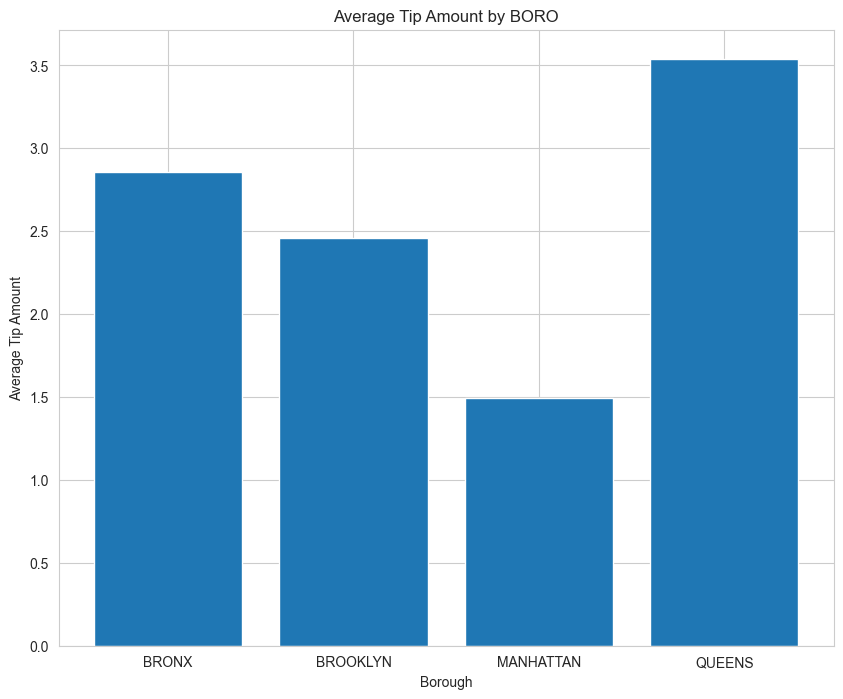

In [74]:
avg_tip_by_borough = cab_rides_with_restaurants.groupby('BORO')['tip_amount'].mean()
plt.figure(figsize=(10, 8))
plt.bar(avg_tip_by_borough.index, avg_tip_by_borough.values)
plt.xlabel('Borough')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by BORO')
plt.show()

## 4. (b) Average Tipping Rate by Passenger Count

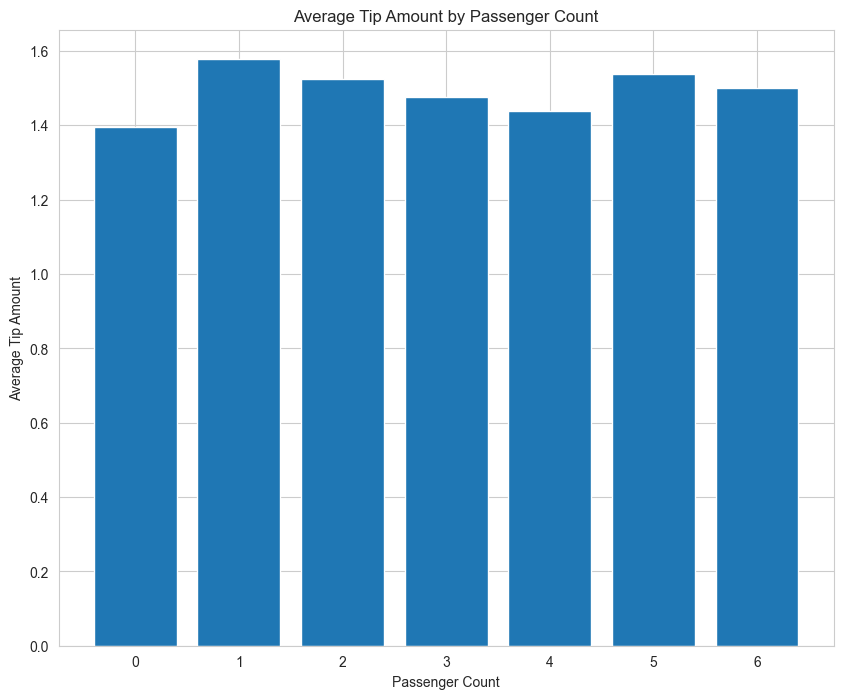

In [68]:
avg_tip_by_passanger_count = cab_rides_with_restaurants.groupby('passenger_count')['tip_amount'].mean()
plt.figure(figsize=(10, 8))
plt.bar(avg_tip_by_passanger_count.index, avg_tip_by_passanger_count.values)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Passenger Count')
plt.show()

## 4. (b) Average Tipping Rate by Meal Time (in hrs)

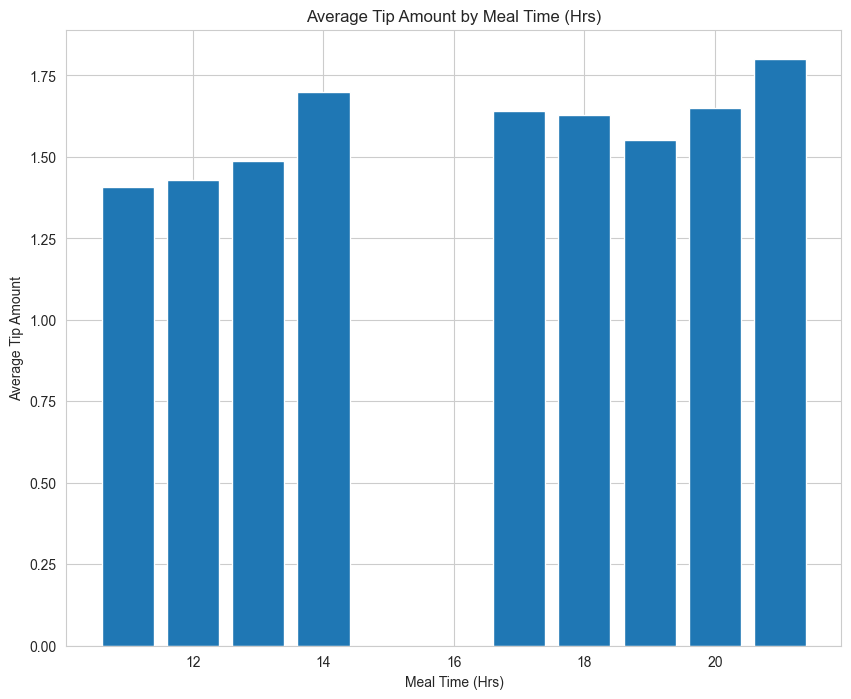

In [69]:
avg_tip_by_passanger_count = cab_rides_with_restaurants.groupby('time_hour')['tip_amount'].mean()
plt.figure(figsize=(10, 8))
plt.bar(avg_tip_by_passanger_count.index, avg_tip_by_passanger_count.values)
plt.xlabel('Meal Time (Hrs)')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Meal Time (Hrs)')
plt.show()

# 5. Predictive Model

A predictive model could recommend a cab passenger restaurants of a particular cuisine based on a couple of features in the dataset:

1. Time of the day information (Can use hour of the day, or just whether it's day or night). Weekday information is also very important in this case and can be used as a feature.
2. BORO information (As each BORO region may have a dominant cuisine)
3. Source location/region of the passenger


Some data outside of the given datasets can also be used to build such a model such as:
1. User's previous searches: Information regarding the user's frequent restaurant cuisine search history and the time and day when the user makes such search requests can be used to recommend the user a cuisine type
2. Dietary Preferences of the user: Ex: If the user is vegetarian, vegan, etc.
3. Weather information

These features may be helpful for the predictive task. 

Two classes of approaches to build such models:

1. Classification Models: Various models can be experimented with: SVMs, Random Forests, XGBoost, Neural Networks
2. Recommendation Systems: Collaborative filtering, content filtering or a hybrid version of both could be used. 